In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
Image.MAX_IMAGE_PIXELS = None

In [3]:
img_path = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/flo-gpu2/code/Users/florian.sonderegger/data_hackdays/data/Orthofoto_2020_10cm_hackdays.tif'
image = Image.open(img_path)

In [5]:
img = cv2.imread(img_path)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [6]:
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

In [7]:
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

True

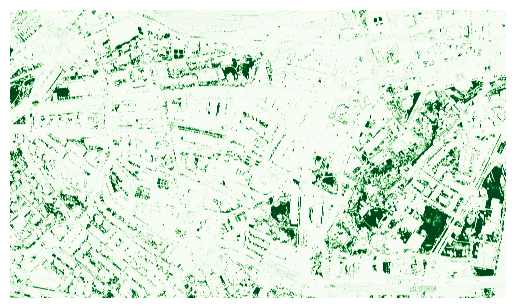

In [8]:
plt.imshow(mask, cmap='Greens')
plt.axis("off")
plt.show
plt.savefig('plot_greenfilter.png')
cv2.imwrite('plot_greenfilter.tif', mask)


In [9]:
maks_median = scipy.ndimage.median_filter(mask, size=15)
maks_median = scipy.ndimage.median_filter(maks_median, size=15)
maks_median = scipy.ndimage.median_filter(maks_median, size=15)
maks_median = scipy.ndimage.median_filter(maks_median, size=15)


True

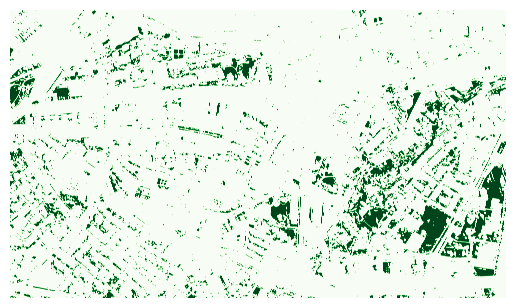

In [11]:
plt.imshow(maks_median, cmap='Greens')
plt.axis("off")
plt.savefig('plot_greenfilter_median.png', dpi=500)
plt.show
cv2.imwrite('plot_greenfilter_median.tif', maks_median)

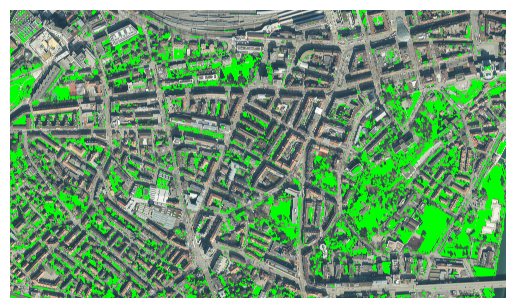

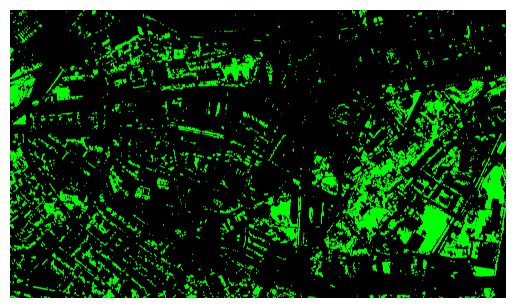

True

In [12]:
contours, hierarchy = cv2.findContours(maks_median, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours with area less than 5 pixels
contours = [contour for contour in contours if cv2.contourArea(contour) >= 20]

# Fill contours in green
mask = np.zeros_like(img)
cv2.drawContours(img, contours, -1, (0, 255, 0), -1)
cv2.drawContours(img, contours, -1, (0, 255, 0), 20)
cv2.drawContours(mask, contours, -1, (0, 255, 0), -1)
cv2.drawContours(mask, contours, -1, (0, 255, 0), 20)

# Plot image with filled contours
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='Greens')
plt.axis('off')
plt.savefig('plot_greenfilter_median_contour.png', dpi=500)
plt.show()

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB), cmap='Greens')
plt.axis('off')
plt.savefig('plot_greenfilter_median_contour_mask.png', dpi=500)
plt.show()

cv2.imwrite('plot_greenfilter_median_contour_mask.tif', mask)